In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig

Matplotlib is building the font cache; this may take a moment.


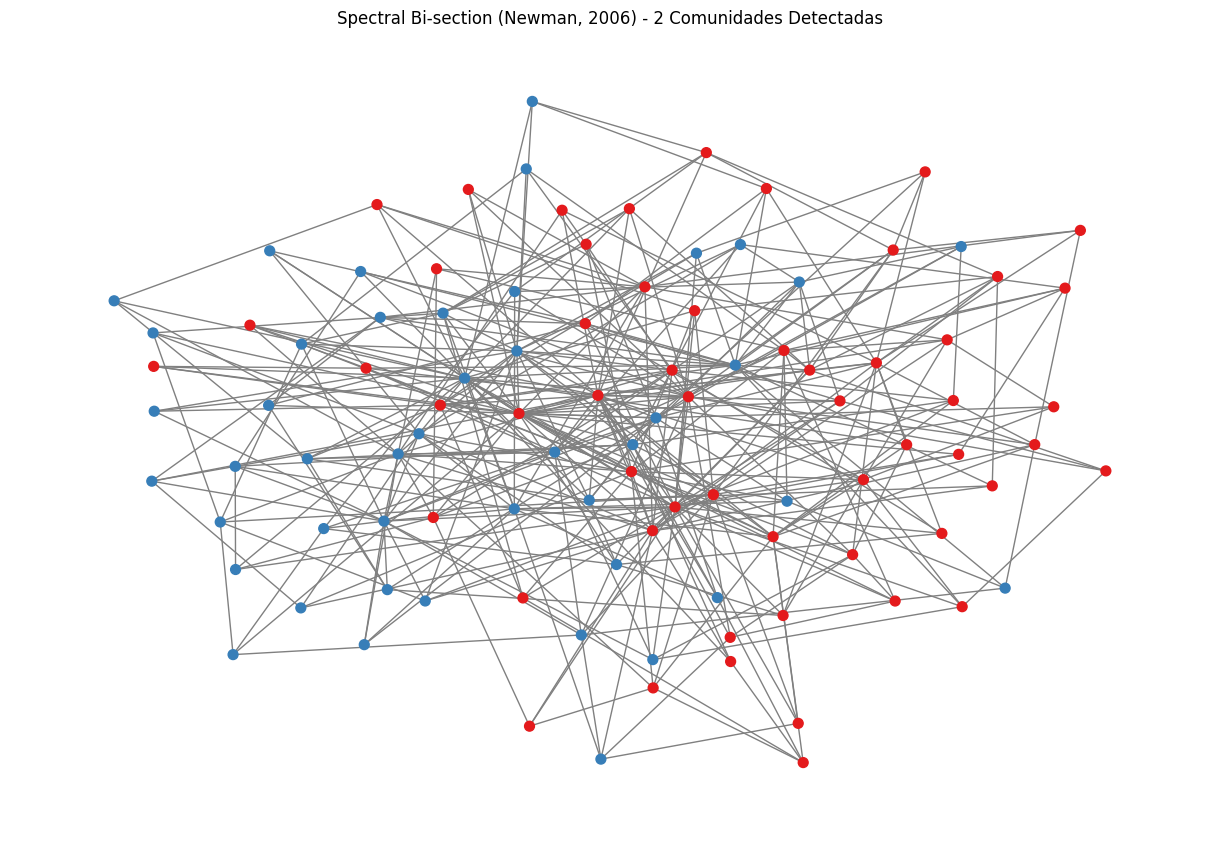

In [2]:
# Carregar a rede
edges = []
with open("scale_free_network.txt") as f:
    for line in f:
        if line.strip():
            u, v = map(int, line.strip().split())
            edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# Obter a lista de nós e a matriz de adjacência
nodes = list(G.nodes())
n = len(nodes)
A = nx.to_numpy_array(G, nodelist=nodes)

# Grau dos nós e matriz de grau esperada
k = A.sum(axis=1)
m = A.sum() / 2
B = A - np.outer(k, k) / (2 * m)  # matriz de modularidade

# Calcular autovalores e autovetores
eigvals, eigvecs = eig(B)

# Selecionar o autovetor correspondente ao maior autovalor
index_max = np.argmax(eigvals.real)
leading_eigvec = eigvecs[:, index_max].real

# Divisão espectral: sinais positivos vs negativos
community_labels = (leading_eigvec > 0).astype(int)

# Mapeamento de comunidade
node_community = {node: int(label) for node, label in zip(nodes, community_labels)}

# Gerar cores
colors = [plt.cm.Set1(node_community[n]) for n in nodes]

# Layout e plot
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    node_color=colors,
    node_size=50,
    with_labels=False,
    edge_color="gray"
)
plt.title("Spectral Bi-section (Newman, 2006) - 2 Comunidades Detectadas")
plt.show()
